<a href="https://colab.research.google.com/github/ahmedbasemdev/PyTorch-Tutorial/blob/main/06_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

Construct the train pipeline      
[1] Design model (input, output size , forward pass)      
[2] loss and optimizer      
[3] Training Loop
  - forward pass : compute the prediction
  - backward pass : gradient
  - update weights


##  0) Prepare Data

In [11]:
xNumpy , yNumpy = datasets.make_regression(n_samples=100 , n_features = 1 , noise =20 , random_state =1)
X = torch.from_numpy(xNumpy.astype(np.float32))
Y = torch.from_numpy(yNumpy.astype(np.float32))
Y = Y.view(Y.shape[0],1)

In [12]:
Y.shape

torch.Size([100, 1])

In [15]:
nSamples , nFeatures = X.shape


## 1) Model

In [17]:
inputSize = nFeatures
outputSize = nFeatures
print(inputSize)
model = nn.Linear(inputSize , outputSize)

1


## 2) Optimizer and Loss

In [18]:
learningRate = .01
nItera = 100

In [22]:
lossFun = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(),lr=learningRate)

## 3) Training Loop

In [24]:
for epoch in range(nItera):
  ## model Prediction
  yPred = model(X)

  ## Loss 
  loss = lossFun(yPred,Y)

  ## 
  loss.backward()

  ## update
  optimizer.step()

  ## reset
  optimizer.zero_grad()

  if epoch %10 == 0:
    [w,b] = model.parameters()
    print(f"epoch {epoch+ 1 } : w {w.item():.3f} , Loss = {loss:.8f}")


epoch 1 : w 1.818 , Loss = 5679.15917969
epoch 11 : w 13.691 , Loss = 4206.50244141
epoch 21 : w 23.806 , Loss = 3142.17822266
epoch 31 : w 32.426 , Loss = 2372.08203125
epoch 41 : w 39.773 , Loss = 1814.28112793
epoch 51 : w 46.036 , Loss = 1409.85168457
epoch 61 : w 51.377 , Loss = 1116.35510254
epoch 71 : w 55.931 , Loss = 903.18341064
epoch 81 : w 59.815 , Loss = 748.23291016
epoch 91 : w 63.129 , Loss = 635.52154541


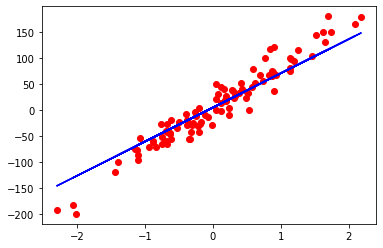

In [26]:
predicted = model(X).detach().numpy()
plt.plot(xNumpy , yNumpy ,'ro')
plt.plot(xNumpy , predicted,'b')
plt.show()